In [35]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn
from shapely.geometry import Point
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

%matplotlib inline 

ModuleNotFoundError: No module named 'seaborn'

In [3]:
%%time
may_trip = pd.read_csv('../data/may_trip.csv')
may_trip.head()

Wall time: 4.29 s


,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-05-01 00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01 00:00:00,00:00:20.460000,2019-05-01 00:00:00,00:02:52.346666,36.15710,-86.80360,36.15660,-86.80670,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780000
1,2019-05-01 00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01 00:00:00,00:01:50.090000,2019-05-01 00:00:00,00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757000
2,2019-05-01 00:05:55.570000,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01 00:00:00,00:03:47.363333,2019-05-01 00:00:00,00:07:13.596666,36.15470,-86.78180,36.15650,-86.78680,"[[36.155068,-86.782124],[36.156597,-86.78675]]",2019-05-02 05:30:24.530000
3,2019-05-01 00:05:55.570000,Bird,BRD2166,PoweredZIIVX,3.0000,1200.78744,2019-05-01 00:00:00,00:04:21.386666,2019-05-01 00:00:00,00:06:59.176666,36.14940,-86.77950,36.15310,-86.77960,"[[36.149741,-86.779344],[36.149741,-86.779327]...",2019-05-02 05:30:24.237000
4,2019-05-01 00:05:55.570000,Bird,BRD2165,PoweredJ7MB3,2.0000,351.04988,2019-05-01 00:00:00,00:04:27.796666,2019-05-01 00:00:00,00:06:23.150000,36.17780,-86.78660,36.17740,-86.78760,"[[36.177699,-86.786477],[36.177711,-86.786469]...",2019-05-02 05:30:24.207000


In [4]:
may_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224969 entries, 0 to 224968
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   pubTimeStamp    224969 non-null  object 
 1   companyName     224969 non-null  object 
 2   tripRecordNum   224969 non-null  object 
 3   sumdID          224969 non-null  object 
 4   tripDuration    224969 non-null  float64
 5   tripDistance    224969 non-null  float64
 6   startDate       224969 non-null  object 
 7   startTime       224969 non-null  object 
 8   endDate         224969 non-null  object 
 9   endTime         224969 non-null  object 
 10  startLatitude   224969 non-null  float64
 11  startLongitude  224969 non-null  float64
 12  endLatitude     224969 non-null  float64
 13  endLongitude    224969 non-null  float64
 14  tripRoute       224969 non-null  object 
 15  create_dt       224969 non-null  object 
dtypes: float64(6), object(10)
memory usage: 27.5+ MB


In [5]:
may_trip.startTime = pd.to_datetime(may_trip.startTime)
may_trip.endTime = pd.to_datetime(may_trip.endTime)

no_start_date = may_trip['startTime'].apply( lambda d : d.time() )
no_end_date = may_trip['endTime'].apply( lambda d : d.time() )

may_trip['startTime'] = no_start_date
may_trip['endTime'] = no_end_date

may_trip.startDate = pd.to_datetime(may_trip.startDate)
may_trip.endDate = pd.to_datetime(may_trip.endDate)

In [6]:
may_trip['start'] = may_trip.apply(lambda r : pd.datetime.combine(r['startDate'],r['startTime']),1)
may_trip['end'] = may_trip.apply(lambda r : pd.datetime.combine(r['endDate'],r['endTime']),1)
may_trip['totaltime'] = may_trip['end'] - may_trip['start']

C:\Users\jerem\AppData\Local\Temp/ipykernel_10308/70659849.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  may_trip['start'] = may_trip.apply(lambda r : pd.datetime.combine(r['startDate'],r['startTime']),1)
C:\Users\jerem\AppData\Local\Temp/ipykernel_10308/70659849.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  may_trip['end'] = may_trip.apply(lambda r : pd.datetime.combine(r['endDate'],r['endTime']),1)


In [7]:
print(may_trip.head())

                 pubTimeStamp companyName tripRecordNum         sumdID  \
0  2019-05-01 00:00:55.423000        Bird       BRD2134   Powered9EAJL   
1  2019-05-01 00:03:33.147000        Lyft          LFT5  Powered296631   
2  2019-05-01 00:05:55.570000        Bird       BRD2168   Powered7S2UU   
3  2019-05-01 00:05:55.570000        Bird       BRD2166   PoweredZIIVX   
4  2019-05-01 00:05:55.570000        Bird       BRD2165   PoweredJ7MB3   

   tripDuration  tripDistance  startDate        startTime    endDate  \
0        3.0000     958.00528 2019-05-01  00:00:20.460000 2019-05-01   
1        1.7156    1371.39112 2019-05-01  00:01:50.090000 2019-05-01   
2        3.0000    2296.58800 2019-05-01  00:03:47.363333 2019-05-01   
3        3.0000    1200.78744 2019-05-01  00:04:21.386666 2019-05-01   
4        2.0000     351.04988 2019-05-01  00:04:27.796666 2019-05-01   

           endTime  startLatitude  startLongitude  endLatitude  endLongitude  \
0  00:02:52.346666       36.15710       -8

In [8]:
may_trip.sort_values(by=['totaltime'])

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,start,end,totaltime
185052,2019-05-26 19:15:08.280000,Bird,BRD3308,PoweredUNKNOWN,0.0,0.00000,2019-05-26,19:17:03.860000,2019-05-26,19:17:04.733333,36.164700,-86.781000,36.164700,-86.781000,[],2019-05-27 05:31:57.320000,2019-05-26 19:17:03.860000,2019-05-26 19:17:04.733333,0 days 00:00:00.873333
160671,2019-05-24 23:03:08.200000,Bird,BRD3253,PoweredUNKNOWN,0.0,0.00000,2019-05-24,23:04:53.123333,2019-05-24,23:04:54.103333,36.161700,-86.774000,36.161700,-86.774000,[],2019-05-25 05:31:44.330000,2019-05-24 23:04:53.123333,2019-05-24 23:04:54.103333,0 days 00:00:00.980000
198810,2019-05-27 20:16:14.983000,Bird,BRD2603,PoweredUNKNOWN,0.0,0.00000,2019-05-27,20:16:36.093333,2019-05-27,20:16:37.203333,36.163700,-86.776300,36.163700,-86.776300,[],2019-05-28 05:31:55.520000,2019-05-27 20:16:36.093333,2019-05-27 20:16:37.203333,0 days 00:00:01.110000
155503,2019-05-24 12:52:40.937000,Bird,BRD91,PoweredUNKNOWN,0.0,0.00000,2019-05-24,12:54:37.006666,2019-05-24,12:54:38.163333,36.155400,-86.781100,36.155400,-86.781100,[],2019-05-25 05:30:57.263000,2019-05-24 12:54:37.006666,2019-05-24 12:54:38.163333,0 days 00:00:01.156667
161433,2019-05-25 00:18:11.863000,Bird,BRD3697,PoweredUNKNOWN,0.0,0.00000,2019-05-25,00:19:35.916666,2019-05-25,00:19:37.200000,36.173600,-86.785400,36.173600,-86.785400,[],2019-05-26 05:30:26.473000,2019-05-25 00:19:35.916666,2019-05-25 00:19:37.200000,0 days 00:00:01.283334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112598,2019-05-18 14:20:06.423000,SPIN,SPI43,Powered5839762,6496.0,193.56956,2019-05-14,01:59:57,2019-05-18,14:15:24,36.162934,-86.777197,36.163460,-86.777320,"[[36.16344,-86.77733],[36.16344,-86.77733],[36...",2019-05-19 09:40:48.260000,2019-05-14 01:59:57.000000,2019-05-18 14:15:24.000000,4 days 12:15:27
216554,2019-05-30 23:41:06.850000,SPIN,SPI1308,Powered1932731,7332.0,1706.03680,2019-05-25,21:25:54,2019-05-30,23:37:35,36.163341,-86.771313,36.164760,-86.776830,"[[36.1647761,-86.7767455],[36.16476,-86.77683]...",2019-05-31 08:54:59.280000,2019-05-25 21:25:54.000000,2019-05-30 23:37:35.000000,5 days 02:11:41
161280,2019-05-24 23:50:53.553000,SPIN,SPI450,Powered2043594,9000.0,7700.13148,2019-05-18,17:47:30,2019-05-24,23:47:10,36.163099,-86.776226,36.149981,-86.796673,"[[36.14998057022332,-86.796672726130851],[36.1...",2019-05-25 08:36:19.873000,2019-05-18 17:47:30.000000,2019-05-24 23:47:10.000000,6 days 05:59:40
168630,2019-05-25 18:16:36.020000,SPIN,SPI17,Powered6197635,11156.0,3517.06048,2019-05-18,00:18:57,2019-05-25,18:14:12,36.159250,-86.772751,36.163797,-86.783278,"[[36.163834653245111,-86.783087877090026],[36....",2019-05-26 09:10:01.160000,2019-05-18 00:18:57.000000,2019-05-25 18:14:12.000000,7 days 17:55:15


In [9]:
may_trip['seconds'] = may_trip['totaltime'].dt.total_seconds()
print(may_trip.head())

                 pubTimeStamp companyName tripRecordNum         sumdID  \
0  2019-05-01 00:00:55.423000        Bird       BRD2134   Powered9EAJL   
1  2019-05-01 00:03:33.147000        Lyft          LFT5  Powered296631   
2  2019-05-01 00:05:55.570000        Bird       BRD2168   Powered7S2UU   
3  2019-05-01 00:05:55.570000        Bird       BRD2166   PoweredZIIVX   
4  2019-05-01 00:05:55.570000        Bird       BRD2165   PoweredJ7MB3   

   tripDuration  tripDistance  startDate        startTime    endDate  \
0        3.0000     958.00528 2019-05-01  00:00:20.460000 2019-05-01   
1        1.7156    1371.39112 2019-05-01  00:01:50.090000 2019-05-01   
2        3.0000    2296.58800 2019-05-01  00:03:47.363333 2019-05-01   
3        3.0000    1200.78744 2019-05-01  00:04:21.386666 2019-05-01   
4        2.0000     351.04988 2019-05-01  00:04:27.796666 2019-05-01   

           endTime  startLatitude  startLongitude  endLatitude  endLongitude  \
0  00:02:52.346666       36.15710       -8

In [10]:
under_minute = may_trip.loc[may_trip['seconds'] <= 60]
under_minute.count()

pubTimeStamp      4559
companyName       4559
tripRecordNum     4559
sumdID            4559
tripDuration      4559
tripDistance      4559
startDate         4559
startTime         4559
endDate           4559
endTime           4559
startLatitude     4559
startLongitude    4559
endLatitude       4559
endLongitude      4559
tripRoute         4559
create_dt         4559
start             4559
end               4559
totaltime         4559
seconds           4559
dtype: int64

Aha! Quite a few under a minute. 

In [11]:
over_day = may_trip.loc[may_trip['seconds'] >= 86400]
over_day.count()

pubTimeStamp      23
companyName       23
tripRecordNum     23
sumdID            23
tripDuration      23
tripDistance      23
startDate         23
startTime         23
endDate           23
endTime           23
startLatitude     23
startLongitude    23
endLatitude       23
endLongitude      23
tripRoute         23
create_dt         23
start             23
end               23
totaltime         23
seconds           23
dtype: int64

Not nearly as many over 24 hours. I'll get rid of both of those below.

In [12]:
may_trip = may_trip.loc[may_trip['seconds'] >= 60]
may_trip = may_trip.loc[may_trip['seconds'] <= 86400]

In [13]:
may_trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220387 entries, 0 to 224967
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   pubTimeStamp    220387 non-null  object         
 1   companyName     220387 non-null  object         
 2   tripRecordNum   220387 non-null  object         
 3   sumdID          220387 non-null  object         
 4   tripDuration    220387 non-null  float64        
 5   tripDistance    220387 non-null  float64        
 6   startDate       220387 non-null  datetime64[ns] 
 7   startTime       220387 non-null  object         
 8   endDate         220387 non-null  datetime64[ns] 
 9   endTime         220387 non-null  object         
 10  startLatitude   220387 non-null  float64        
 11  startLongitude  220387 non-null  float64        
 12  endLatitude     220387 non-null  float64        
 13  endLongitude    220387 non-null  float64        
 14  tripRoute       2203

In [14]:
may_trip['hours'] = may_trip.start.dt.hour

In [18]:
may_trip.tail(10)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,...,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,start,end,totaltime,seconds,hours
224958,2019-06-01 23:50:42.137000,Lime,LIM5020,PoweredJFNG45B3NAFQ5,29.866667,12434.2320,2019-05-31,23:48:57,2019-06-01,00:18:49,...,-86.780680,36.169997,-86.784262,"[[36.14183,-86.78097],[36.141729999999995,-86....",2019-06-02 08:04:49.353000,2019-05-31 23:48:57,2019-06-01 00:18:49,0 days 00:29:52,1792.0,23
224959,2019-06-01 23:50:42.137000,Lime,LIM5017,Powered7JGOE46QX27EV,31.350000,13507.0536,2019-05-31,23:47:54,2019-06-01,00:19:15,...,-86.778610,36.170993,-86.785108,"[[36.14146,-86.77861],[36.14195,-86.7786],[36....",2019-06-02 08:04:49.263000,2019-05-31 23:47:54,2019-06-01 00:19:15,0 days 00:31:21,1881.0,23
224960,2019-06-01 23:50:42.337000,Lime,LIM5183,Powered7AJ4WRGIBQEIP,60.650000,17532.5952,2019-05-31,23:19:12,2019-06-01,00:19:51,...,-86.778506,36.171121,-86.785093,"[[36.13427,-86.77851],[36.13494,-86.7783],[36....",2019-06-02 08:04:55.153000,2019-05-31 23:19:12,2019-06-01 00:19:51,0 days 01:00:39,3639.0,23
224961,2019-06-01 23:50:42.337000,Lime,LIM5185,Powered5BAF6GCHYSPLQ,42.183333,15124.4880,2019-05-31,23:36:36,2019-06-01,00:18:47,...,-86.778420,36.170935,-86.785228,"[[36.1396,-86.77831],[36.14166,-86.77854],[36....",2019-06-02 08:04:55.213000,2019-05-31 23:36:36,2019-06-01 00:18:47,0 days 00:42:11,2531.0,23
224962,2019-06-01 23:50:42.337000,Lime,LIM5184,PoweredC6PDDC6OOF65G,27.550000,8884.4064,2019-05-31,23:36:23,2019-06-01,00:03:56,...,-86.778543,36.160208,-86.782798,"[[36.13622,-86.77854],[36.15882,-86.78189],[36...",2019-06-02 08:04:55.183000,2019-05-31 23:36:23,2019-06-01 00:03:56,0 days 00:27:33,1653.0,23
224963,2019-06-01 23:50:42.337000,Lime,LIM5186,Powered2OFHK7WJJGPSG,43.733333,14632.3680,2019-05-31,23:44:06,2019-06-01,00:27:50,...,-86.776549,36.172185,-86.785387,"[[36.1382,-86.77696],[36.13872,-86.77828000000...",2019-06-02 08:04:55.243000,2019-05-31 23:44:06,2019-06-01 00:27:50,0 days 00:43:44,2624.0,23
224964,2019-06-01 23:50:42.373000,Lime,LIM5241,PoweredJ6OI7QJIK4NO2,62.316667,0.0000,2019-05-31,23:16:25,2019-06-01,00:18:44,...,-86.779007,36.155466,-86.779859,"[[36.1317,-86.77903]]",2019-06-02 08:04:56.923000,2019-05-31 23:16:25,2019-06-01 00:18:44,0 days 01:02:19,3739.0,23
224965,2019-06-01 23:50:42.397000,Lime,LIM5285,PoweredQDVYGLDL6ZQDU,22.383333,9337.1568,2019-05-31,23:59:45,2019-06-01,00:22:08,...,-86.789366,36.149205,-86.786162,"[[36.12621,-86.78937],[36.125840000000004,-86....",2019-06-02 08:04:58.683000,2019-05-31 23:59:45,2019-06-01 00:22:08,0 days 00:22:23,1343.0,23
224966,2019-06-01 23:50:42.480000,Lime,LIM5413,PoweredH5HCTZB5WVABT,40.200000,20951.1888,2019-05-31,23:31:19,2019-06-01,00:11:31,...,-86.778251,36.143138,-86.793144,"[[36.12673,-86.77825],[36.12664,-86.77731],[36...",2019-06-02 08:05:02.987000,2019-05-31 23:31:19,2019-06-01 00:11:31,0 days 00:40:12,2412.0,23
224967,2019-06-01 23:50:42.480000,Lime,LIM5412,PoweredFXC5KHVLI3T7C,41.033333,21049.6128,2019-05-31,23:30:26,2019-06-01,00:11:28,...,-86.778195,36.143140,-86.793125,"[[36.12673,-86.77819],[36.126740000000005,-86....",2019-06-02 08:05:02.957000,2019-05-31 23:30:26,2019-06-01 00:11:28,0 days 00:41:02,2462.0,23


Now I have specific hours I can filter on. 

In [19]:
print(may_trip['hours'].value_counts())

23    19663
0     16246
18    15787
19    15283
17    15266
20    14120
21    14005
1     13868
16    13440
22    12649
2     12241
3     11233
15     9325
4      8229
14     6735
5      4962
13     4529
6      3493
12     2998
7      2121
11     1513
8      1222
10      829
9       630
Name: hours, dtype: int64


In [20]:
seems like most trips are taken at night

SyntaxError: invalid syntax (Temp/ipykernel_10308/3720208712.py, line 1)

In [21]:
no_rides = may_trip.loc[may_trip['tripDistance'] <= 0.0]

no_rides

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,...,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,start,end,totaltime,seconds,hours
6,2019-05-01 00:07:55.880000,Lyft,LFT10,Powered329418,1.093917,0.0,2019-05-01,00:06:50.106666,2019-05-01,00:07:55.740000,...,-86.784080,36.151710,-86.784110,"[[36.15168,-86.78408],[36.15171,-86.78411]]",2019-05-02 07:20:32.890000,2019-05-01 00:06:50.106666,2019-05-01 00:07:55.740000,0 days 00:01:05.633334,65.633334,0
22,2019-05-01 00:13:37.357000,Lyft,LFT27,Powered633835,1.573733,0.0,2019-05-01,00:12:02.786666,2019-05-01,00:13:37.213333,...,-86.784820,36.159150,-86.784830,"[[36.15913,-86.78482],[36.15915,-86.78483]]",2019-05-02 07:20:33.453000,2019-05-01 00:12:02.786666,2019-05-01 00:13:37.213333,0 days 00:01:34.426667,94.426667,0
34,2019-05-01 00:20:56.140000,Bird,BRD2236,PoweredSQ9FM,4.000000,0.0,2019-05-01,00:17:12.456666,2019-05-01,00:20:56.626666,...,-86.796900,36.141100,-86.797300,"[[36.141046,-86.796821],[36.141185,-86.797218]]",2019-05-02 05:30:26.197000,2019-05-01 00:17:12.456666,2019-05-01 00:20:56.626666,0 days 00:03:44.170000,224.170000,0
39,2019-05-01 00:20:56.140000,Bird,BRD2234,Powered36EWB,2.000000,0.0,2019-05-01,00:18:55.510000,2019-05-01,00:20:58.463333,...,-86.788800,36.159800,-86.788500,"[[36.159817,-86.788497],[36.159684,-86.788742]...",2019-05-02 05:30:25.617000,2019-05-01 00:18:55.510000,2019-05-01 00:20:58.463333,0 days 00:02:02.953333,122.953333,0
99,2019-05-01 00:40:56.893000,Bird,BRD2309,PoweredFMAJJ,2.000000,0.0,2019-05-01,00:40:45.640000,2019-05-01,00:42:53.763333,...,-86.815600,36.150400,-86.815700,"[[36.150486,-86.815605]]",2019-05-02 05:30:28.583000,2019-05-01 00:40:45.640000,2019-05-01 00:42:53.763333,0 days 00:02:08.123333,128.123333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224886,2019-06-01 22:50:39.897000,Lime,LIM2146,PoweredNLXKCDBAH23CJ,24.733333,0.0,2019-05-31,23:45:44,2019-06-01,00:10:28,...,-86.774158,36.155833,-86.775364,"[[36.15656,-86.77409]]",2019-06-02 08:00:12.980000,2019-05-31 23:45:44.000000,2019-06-01 00:10:28.000000,0 days 00:24:44,1484.000000,23
224912,2019-06-01 22:50:41.883000,Lime,LIM4855,PoweredJ6OI7QJIK4NO2,62.316667,0.0,2019-05-31,23:16:25,2019-06-01,00:18:44,...,-86.779007,36.155466,-86.779859,"[[36.1317,-86.77903]]",2019-06-02 08:01:47.700000,2019-05-31 23:16:25.000000,2019-06-01 00:18:44.000000,0 days 01:02:19,3739.000000,23
224932,2019-06-01 23:50:39.883000,Lime,LIM1516,Powered5SF4HXFBOGUWA,9.750000,0.0,2019-05-31,23:55:40,2019-06-01,00:05:25,...,-86.779578,36.163708,-86.779992,"[[36.16338,-86.78008]]",2019-06-02 08:02:47.897000,2019-05-31 23:55:40.000000,2019-06-01 00:05:25.000000,0 days 00:09:45,585.000000,23
224939,2019-06-01 23:50:40.380000,Lime,LIM2326,PoweredNLXKCDBAH23CJ,24.733333,0.0,2019-05-31,23:45:44,2019-06-01,00:10:28,...,-86.774158,36.155833,-86.775364,"[[36.15656,-86.77409]]",2019-06-02 08:03:15.923000,2019-05-31 23:45:44.000000,2019-06-01 00:10:28.000000,0 days 00:24:44,1484.000000,23


In [22]:
no_rides.sort_values(by='tripDistance')

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,...,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,start,end,totaltime,seconds,hours
106055,2019-05-17 21:05:14.767000,Bird,BRD2461,PoweredYGCHC,5.000000,-2.758530e+06,2019-05-17,21:01:20.166666,2019-05-17,21:06:33.026666,...,-86.789900,36.154300,-86.785900,"[[36.153016,-86.789799],[36.153204,-86.789602]...",2019-05-18 05:31:26.960000,2019-05-17 21:01:20.166666,2019-05-17 21:06:33.026666,0 days 00:05:12.860000,312.860000,21
173827,2019-05-25 22:19:13.733000,Bird,BRD6540,Powered2VMGC,2.000000,-2.253937e+06,2019-05-25,22:17:09.306666,2019-05-25,22:19:32.360000,...,-86.791600,36.153300,-86.789100,"[[36.152161,-86.791157],[36.153353,-86.789015]]",2019-05-26 05:32:32.830000,2019-05-25 22:17:09.306666,2019-05-25 22:19:32.360000,0 days 00:02:23.053334,143.053334,22
23517,2019-05-04 20:40:26.580000,Bird,BRD3383,PoweredUZ2JH,2.000000,-1.685315e+06,2019-05-04,20:40:10.926666,2019-05-04,20:42:18.600000,...,-86.785700,36.174000,-86.785700,"[[36.173884,-86.785616],[36.173884,-86.785616]...",2019-05-05 05:31:48.947000,2019-05-04 20:40:10.926666,2019-05-04 20:42:18.600000,0 days 00:02:07.673334,127.673334,20
19228,2019-05-04 17:45:17.800000,Bird,BRD1296,PoweredUZ2JH,2.000000,-1.684806e+06,2019-05-04,17:44:47.986666,2019-05-04,17:46:26.800000,...,-86.785400,36.173400,-86.785400,"[[36.173432,-86.78532],[36.173433,-86.78532],[...",2019-05-05 05:31:18.497000,2019-05-04 17:44:47.986666,2019-05-04 17:46:26.800000,0 days 00:01:38.813334,98.813334,17
16936,2019-05-04 03:24:32.237000,Bird,BRD5207,PoweredUZ2JH,3.000000,-1.684701e+06,2019-05-04,03:23:54.140000,2019-05-04,03:26:29.310000,...,-86.786300,36.172400,-86.786300,"[[36.172513,-86.786335],[36.172507,-86.786338]...",2019-05-05 05:30:42.633000,2019-05-04 03:23:54.140000,2019-05-04 03:26:29.310000,0 days 00:02:35.170000,155.170000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73879,2019-05-12 14:59:27.237000,Bird,BRD229,PoweredI9ULK,1.000000,0.000000e+00,2019-05-12,14:58:14.360000,2019-05-12,14:59:37.113333,...,-86.766000,36.156800,-86.766000,"[[36.156862,-86.765932],[36.156833,-86.765923]...",2019-05-13 05:31:05.017000,2019-05-12 14:58:14.360000,2019-05-12 14:59:37.113333,0 days 00:01:22.753333,82.753333,14
73884,2019-05-12 15:03:36.633000,Lime,LIM1325,PoweredBWUEHAVVGNTBD,1.966667,0.000000e+00,2019-05-12,15:00:46,2019-05-12,15:02:44,...,-86.777160,36.157766,-86.776079,"[[36.1575,-86.77678]]",2019-05-13 08:15:03.323000,2019-05-12 15:00:46.000000,2019-05-12 15:02:44.000000,0 days 00:01:58,118.000000,15
73903,2019-05-12 15:09:27.817000,Bird,BRD252,Powered5VF5W,2.000000,0.000000e+00,2019-05-12,15:07:29.330000,2019-05-12,15:09:37.130000,...,-86.780400,36.162800,-86.780700,"[[36.162876,-86.780665],[36.162453,-86.782135]...",2019-05-13 05:31:05.173000,2019-05-12 15:07:29.330000,2019-05-12 15:09:37.130000,0 days 00:02:07.800000,127.800000,15
73930,2019-05-12 15:14:27.873000,Bird,BRD271,PoweredUYQMQ,5.000000,0.000000e+00,2019-05-12,15:10:16.930000,2019-05-12,15:15:40.843333,...,-86.777900,36.165600,-86.777800,"[[36.165763,-86.777728],[36.165697,-86.777784]...",2019-05-13 05:31:05.570000,2019-05-12 15:10:16.930000,2019-05-12 15:15:40.843333,0 days 00:05:23.913333,323.913333,15


Negative trip distance? Seems a little off.

Text(0, 0.5, 'Trip Count')

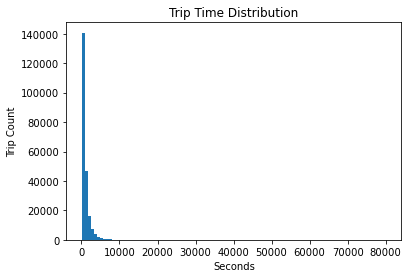

In [23]:
plt.hist(may_trip.seconds, bins = 100)
plt.title('Trip Time Distribution')
plt.xlabel('Seconds')
plt.ylabel('Trip Count')

That's a strange distribution. Let's convert to minutes to see if anything changes.

In [24]:
may_trip['minutes'] = may_trip['seconds'] / 60

Text(0, 0.5, 'Trip Count')

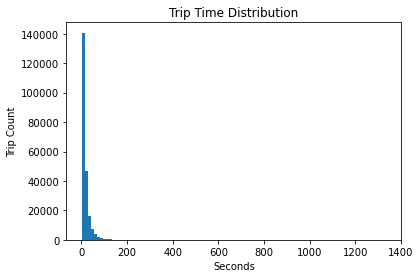

In [25]:
plt.hist(may_trip.minutes, bins = 100)
plt.title('Trip Time Distribution')
plt.xlabel('Seconds')
plt.ylabel('Trip Count')

Definitely seems wrong.

Text(0, 0.5, 'Trip Count')

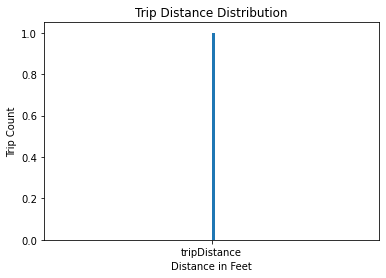

In [26]:
plt.hist('tripDistance', bins=100)
plt.title('Trip Distance Distribution')
plt.xlabel('Distance in Feet')
plt.ylabel('Trip Count')

Lots of failed things happening below. Whomp whomp. 

In [27]:
import re

coord_list = re.findall(r'\[.+\]', may_trip.tripRoute[0])
sub_coord = re.sub(r'\[', '', str(coord_list))
sub_coord = re.sub(r'\]', '', str(sub_coord))
regex = re.findall(r'\d+\.\d+,-\d+\.\d+', sub_coord)
    
print(regex)


['36.157235,-86.803612', '36.157235,-86.80362', '36.157226,-86.803642', '36.157226,-86.803665', '36.157226,-86.803665', '36.157226,-86.803665', '36.157218,-86.803734', '36.157218,-86.803734', '36.157218,-86.803734', '36.157218,-86.803734', '36.157206,-86.803872', '36.157206,-86.803872', '36.157191,-86.803986', '36.157191,-86.803986', '36.157191,-86.803986', '36.157143,-86.804184', '36.157143,-86.804184', '36.157143,-86.804184', '36.157081,-86.804406', '36.157081,-86.804406', '36.157081,-86.804406', '36.157081,-86.804406', '36.157043,-86.804642', '36.157001,-86.80484', '36.157001,-86.80484', '36.156945,-86.805069', '36.156945,-86.805069', '36.156945,-86.805069', '36.156913,-86.805267', '36.156913,-86.805267', '36.156856,-86.805489', '36.156856,-86.805489', '36.156913,-86.805267', '36.156856,-86.805489', '36.156856,-86.805489', '36.156821,-86.805696', '36.156821,-86.805696', '36.1568,-86.805817', '36.1568,-86.805817', '36.1568,-86.805817', '36.156746,-86.806001', '36.156746,-86.806001', 

In [36]:
search = []    
for values in may_trip['tripRoute']:
    search.append(re.search(r'.+\..+-.+\..+', values).group())

may_trip['newtrip'] = search

may_trip.head()

AttributeError: 'NoneType' object has no attribute 'group'

In [37]:
may_trip.tripRoute = may_trip.tripRoute.str.replace('[', '')
may_trip.tripRoute = may_trip.tripRoute.str.replace(']', '')

for i in may_trip.tripRoute:
    i.split(',')


C:\Users\jerem\AppData\Local\Temp/ipykernel_10308/1257715549.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  may_trip.tripRoute = may_trip.tripRoute.str.replace('[', '')
C:\Users\jerem\AppData\Local\Temp/ipykernel_10308/1257715549.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  may_trip.tripRoute = may_trip.tripRoute.str.replace(']', '')


In [38]:
def calculate_distance(tripRoute):
    results = []
    for i in range(1, len(positions)):
        loc1 = positions[i - 1]
        loc2 = positions[i]

        lat1 = loc1[0]
        lng1 = loc1[1]

        lat2 = loc2[0]
        lng2 = loc2[1]

        degreesToRadians = (math.pi / 180)
        latrad1 = lat1 * degreesToRadians
        latrad2 = lat2 * degreesToRadians
        dlat = (lat2 - lat1) * degreesToRadians
        dlng = (lng2 - lng1) * degreesToRadians

        a = math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(latrad1) * \
        math.cos(latrad2) * math.sin(dlng / 2) * math.sin(dlng / 2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
        r = 6371000

        results.append(r * c)

    return (sum(results) / 1000)

In [ ]:
may_7_am = may_trip.loc[may_trip.hours == 7]
may_7_am.info

Now, to break out the trip routes.

In [ ]:
promise_zone = gpd.read_file('../data/MDHA_Promise_Zones/Export_Output_5.shp')

In [ ]:
promise_zone.info()

In [ ]:
print(promise_zone.crs)

In [ ]:
promise_zone = promise_zone.geometry.to_crs('EPSG:4326')

In [ ]:
promise_zone.plot();

In [29]:
promise_zone.geometry.centroid

NameError: name 'promise_zone' is not defined

In [30]:
center = promise_zone.geometry.centroid[3]

NameError: name 'promise_zone' is not defined

In [31]:
print(center)

NameError: name 'center' is not defined

In [32]:
promise_center = [center.y, center.x]

NameError: name 'center' is not defined

In [33]:
m = folium.Map(promise_center, zoom_start=12)

for _, row in no_rides.head(50).iterrows():
    folium.Circle([row['startLatitude'], row['startLongitude']],
                        radius=15,
                        fill_color="#3db7e4", # divvy color
                        ).add_child(folium.Popup(may_trip.sumdID)).add_to(m)

    folium.Circle([row['endLatitude'], row['endLongitude']],
                        radius=15,
                        fill_color="red", # divvy color
                       ).add_to(m)

    folium.PolyLine([[row['startLatitude'], row['startLongitude']], 
                     [row['endLatitude'], row['endLongitude']]]).add_to(m)
m.save('../maps/m.html')
m

NameError: name 'folium' is not defined

In [34]:
cluster_m = folium.Map(promise_center, zoom_start=12)

marker_cluster = MarkerCluster().add_to(cluster_m)

folium.GeoJson(promise_zone).add_to(cluster_m)

for _, row in may_trip.head(500).iterrows():
    folium.CircleMarker([row['startLatitude'], row['startLongitude']],
                        radius=4,
                        fill_color="#3db7e4", # divvy color
                       ).add_to(cluster_m)

    folium.CircleMarker([row['endLatitude'], row['endLongitude']],
                        radius=4,
                        fill_color="red", # divvy color
                       ).add_to(cluster_m)

    folium.PolyLine([[row['startLatitude'], row['startLongitude']], 
                     [row['endLatitude'], row['endLongitude']]]).add_to(cluster_m)

marker = folium.Marker
marker.add_to(cluster_m)
cluster_m

NameError: name 'folium' is not defined

In [39]:
may_trip_clean = may_trip

In [40]:
may_trip_clean.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,...,endLatitude,endLongitude,tripRoute,create_dt,start,end,totaltime,seconds,hours,minutes
0,2019-05-01 00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01,00:00:20.460000,2019-05-01,00:02:52.346666,...,36.15660,-86.80670,"36.157235,-86.803612,36.157235,-86.80362,36.15...",2019-05-02 05:30:23.780000,2019-05-01 00:00:20.460000,2019-05-01 00:02:52.346666,0 days 00:02:31.886666,151.886666,0,2.531444
1,2019-05-01 00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01,00:01:50.090000,2019-05-01,00:03:33.026666,...,36.16054,-86.77689,"36.15797,-86.77896,36.15795,-86.77873,36.15798...",2019-05-02 07:20:32.757000,2019-05-01 00:01:50.090000,2019-05-01 00:03:33.026666,0 days 00:01:42.936666,102.936666,0,1.715611
2,2019-05-01 00:05:55.570000,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01,00:03:47.363333,2019-05-01,00:07:13.596666,...,36.15650,-86.78680,"36.155068,-86.782124,36.156597,-86.78675",2019-05-02 05:30:24.530000,2019-05-01 00:03:47.363333,2019-05-01 00:07:13.596666,0 days 00:03:26.233333,206.233333,0,3.437222
3,2019-05-01 00:05:55.570000,Bird,BRD2166,PoweredZIIVX,3.0000,1200.78744,2019-05-01,00:04:21.386666,2019-05-01,00:06:59.176666,...,36.15310,-86.77960,"36.149741,-86.779344,36.149741,-86.779327,36.1...",2019-05-02 05:30:24.237000,2019-05-01 00:04:21.386666,2019-05-01 00:06:59.176666,0 days 00:02:37.790000,157.790000,0,2.629833
4,2019-05-01 00:05:55.570000,Bird,BRD2165,PoweredJ7MB3,2.0000,351.04988,2019-05-01,00:04:27.796666,2019-05-01,00:06:23.150000,...,36.17740,-86.78760,"36.177699,-86.786477,36.177711,-86.786469,36.1...",2019-05-02 05:30:24.207000,2019-05-01 00:04:27.796666,2019-05-01 00:06:23.150000,0 days 00:01:55.353334,115.353334,0,1.922556


In [41]:
may_trip_clean.save('../data/may_trip_clean.csv')

AttributeError: 'DataFrame' object has no attribute 'save'

In [42]:
may_trip_clean.to_csv('may_trip_clean.csv')